# Laboratorio 3: Exploración y Visualización de Datos
Fecha: Abril 2025

Integrantes: **AGREGUEN SUS NOMBRES COMPLETOS** y la sección de cada integrante


## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)?

In [3]:
tipos.shape

(4296, 5)

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [4]:
tipos.iloc[234, :]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [6]:
tipos['Anio'].unique()

array([2010, 2011])

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones más peligrosas en cuanto a accidentes de tránsito.

    **OJO**: hay que sumar la cantidad de accidentes para los distintos tipos de accidente de una misma región

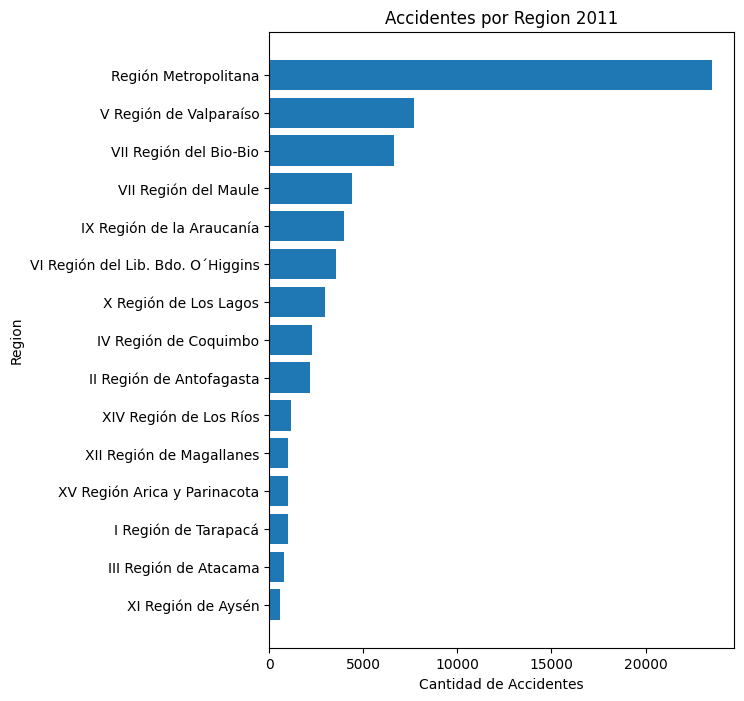

In [11]:
tipos2011 = tipos[(tipos['Anio'] == 2011) & (tipos["Muestra"] == "Regional")]
accidentes2011 = tipos2011.groupby('Descripcion')['Cantidad'].sum().sort_values()
fig, ax = plt.subplots(figsize=(6, 8))

ax.barh(accidentes2011.index, accidentes2011.values)

ax.set_title('Accidentes por Region 2011')
ax.set_xlabel('Cantidad de Accidentes')
ax.set_ylabel('Region')

plt.show()

R:

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

/var/folders/ym/jv0bph554zn748vd9skzrbtw0000gn/T/ipykernel_26763/3247324007.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accidentes2010, labels=accidentes2010.index)


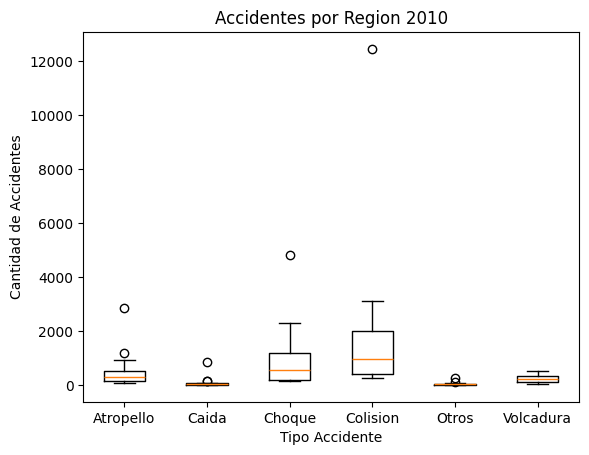

In [12]:
tipos2010 = tipos[(tipos['Anio'] == 2010) & (tipos["Muestra"] == "Regional")]

accidentes2010 = tipos2010.groupby('TipoAccidente')['Cantidad'].apply(list)

fig, ax = plt.subplots()

ax.boxplot(accidentes2010, labels=accidentes2010.index)

ax.set_title('Accidentes por Region 2010')
ax.set_xlabel('Tipo Accidente')
ax.set_ylabel('Cantidad de Accidentes')

plt.show()

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [4]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [14]:
print('Gender:', diabetes['gender'].value_counts().to_dict())
print('Hypertension:', diabetes['hypertension'].value_counts().to_dict())
print('Heart disease:', diabetes['heart_disease'].value_counts().to_dict())
print('Smoking history:', diabetes['smoking_history'].value_counts().to_dict())
print('Diabetes:', diabetes['diabetes'].value_counts().to_dict())

Gender: {'Female': 58552, 'Male': 41430, 'Other': 18}
Hypertension: {0: 92515, 1: 7485}
Heart disease: {0: 96058, 1: 3942}
Smoking history: {'No Info': 35816, 'never': 35095, 'former': 9352, 'current': 9286, 'not current': 6447, 'ever': 4004}
Diabetes: {0: 91500, 1: 8500}


8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [15]:
diabatesdf = diabetes.select_dtypes(include='number')

diabatesdf.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Clasificación

Ahora crearemos un clasificador binario (por ahora no importa cómo funciona), y veremos que tal es su desempeño decidiendo si una persona tiene diabetes o no.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Droppear categoricas
df_clf = diabetes.drop(columns=['gender', 'smoking_history'])
# Separar atributos y target
X = df_clf.drop(columns=['diabetes'])
y = df_clf['diabetes']
# Separar conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Entrenar modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
# Obtener predicciones
y_pred = clf.predict(X_test)

### Veamos su matríz de confusión

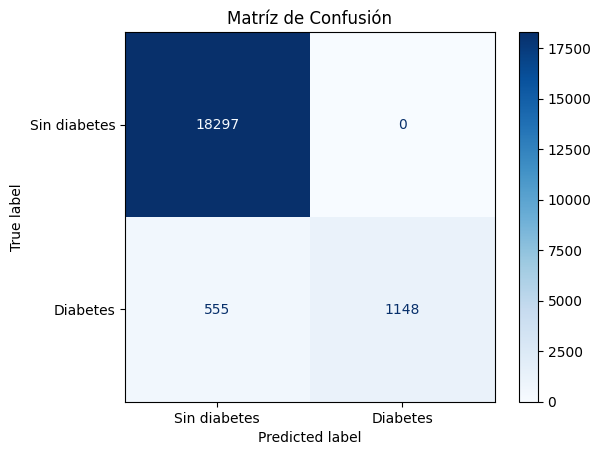

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Matríz de Confusión')
plt.show()

9. ¿Qué se puede decir a partir de la matriz de confusión? ¿El clasificador tiene un problema asociado a precision o recall?

R: 

### Curva ROC 🤘

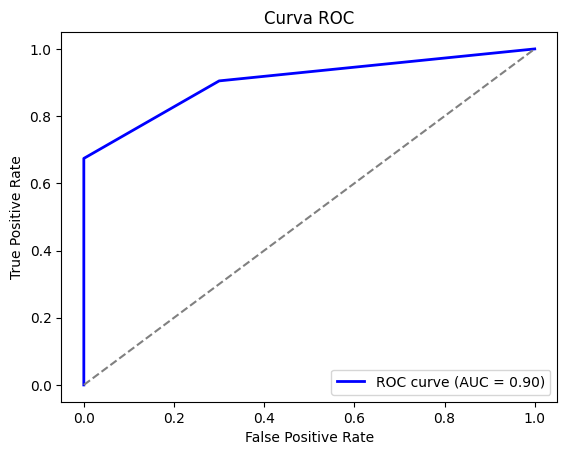

In [18]:
from sklearn.metrics import roc_curve, auc

y_scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Identidad
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

10. ¿Podemos decir que el modelo es bueno según su curva ROC? ¿Para que podemos usar esta visualización?

R: 

11. ¿Sería seguro usar este clasificador en un caso real diagnosicando pacientes?

R:

Y eso es todo por hoy :)
